#### 3. 项目规模分析

近年来，GitHub作为全球最大的开源代码托管平台，扮演着重要的角色，为研究者和开发者提供了大量有关软件开发、协作和知识共享的数据。其中，对于GitHub项目规模的分析为开发者和用户提供了一个更全面的认识和评估项目的方式，通过对GitHub项目规模的深入研究，能够评估项目的稳定性和可靠性，同时也为其他开发者提供了参与项目的机会和动力。
##### 3.1 意义
- 项目管理：了解项目规模可以帮助团队或组织更好地进行项目管理。知道项目的规模可以帮助确定项目所需的资源和时间，并为项目规划、任务分配和进度管理提供指导。
- 项目评估：通过对项目规模的分析，可以评估项目的复杂性和难度。这有助于确定项目的可行性和风险，并帮助项目负责人做出决策，例如是否需要增加团队成员或调整项目的范围。
- 开发进度和活跃度：项目规模分析可以帮助了解项目的开发进度和活跃度。通过观察代码行数、贡献者数量等指标，可以判断项目的当前状态和开发活动水平。
- 社区参与度：对于开源项目来说，项目规模也可以反映社区的参与度和活跃程度。一个庞大的社区通常表示项目具有较高的吸引力和影响力，有助于吸引更多的贡献者和用户。
- 技术选型和合作机会：项目规模分析还可以帮助开发者和组织在技术选型和合作机会上做出决策。了解项目的规模可以帮助确定合适的技术框架和工具，以及与其他项目或组织进行合作的机会。

综上所述，通过对GitHub项目规模的分析，可以为项目管理、评估、开发进度监控、社区参与度和合作机会提供重要的参考和指导。这些分析有助于更好地理解和管理项目，从而提高项目的成功概率和效率。
##### 3.2 项目代码行数分析

In [1]:
# 读取数据
import pandas as pd

file = './data/top300_20_23_1681699961594.txt'
chunks = pd.read_csv(file, chunksize=1000)

# 迭代读取块，并打印前10行
for chunk in chunks:
    print(chunk.head(10))
    # 只需要打印第一个块的前五行
    break

            id         type action  actor_id  actor_login  repo_id  repo_name  \
0  18772675140  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   
1  18778863929  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   
2  18778869404  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   
3  18778871633  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   
4  18783846610  DeleteEvent  added    804608  PeterPetrik  1690480  qgis/QGIS   
5  18797722057  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   
6  18798733998  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   
7  18799092699  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   
8  18799198225  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   
9  18814429611  DeleteEvent  added   1829991  nyalldawson  1690480  qgis/QGIS   

   org_id org_login           created_at  ...  commit_comment_id  \
0  483444      qgis  2021-11-07 12:57:17

In [ ]:
# 获得TOP300仓库名
result = set()
for chunk in chunks:
    for _, row in chunk.iterrows():
        repo_name = row[6]
        result.add(repo_name)
with open('./data/repo_name.txt', "w") as file:
    for item in result:
        file.write(str(item) + "\n")

In [5]:
# 获得每个项目的代码行数，包括增加的代码行数、减少的代码行数和变化的代码总行数
from pandas import DataFrame
import os, json

df = DataFrame(columns=['org_name', 'repo_name', 'code_add', 'code_remove', 'code_change_sum'])
i = 0
with open('./data/repo_name.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        line = line.strip()  # 去除换行符
        org_name, repo_name = line.split('/')

        file_code_add = f'./data/top_300_metrics/{org_name}/{repo_name}/code_change_lines_add.json'
        file_code_remove = f'./data/top_300_metrics/{org_name}/{repo_name}/code_change_lines_remove.json'
        file_code_change = f'./data/top_300_metrics/{org_name}/{repo_name}/code_change_lines_sum.json'
        
        code_add_sum, code_remove_sum, code_change_sum = 0,0,0
        #计算项目 总增加的代码行数
        if os.path.exists(file_code_add):
            with open(file_code_add, 'r', encoding='utf-8') as file:
                data = json.load(file) 
                code_add_sum = sum(data.values())                
                
        #计算项目 总减少的代码行数
        if os.path.exists(file_code_remove):
            with open(file_code_remove, 'r', encoding='utf-8') as file:
                data = json.load(file) 
                code_remove_sum = sum(data.values())  

        #计算项目 总变化的代码行数
        if os.path.exists(file_code_change):
            with open(file_code_change, 'r', encoding='utf-8') as file:
                data = json.load(file) 
                code_change_sum = sum(data.values())  

        df.loc[i] = [org_name, repo_name, code_add_sum, code_remove_sum, code_change_sum]
        
        # print(org_name, repo_name, code_add_sum, code_remove_sum, code_change_sum)
        i += 1
        

每个项目增加的总代码行数

最大值: 148751648
平均值: 12083667.48
最小值: 0
频数: 0           2
3976079     1
26528604    1
23144244    1
5975144     1
           ..
2297671     1
11100581    1
10355345    1
6357439     1
7152994     1
Name: code_add, Length: 299, dtype: int64


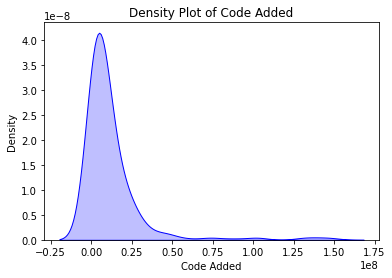

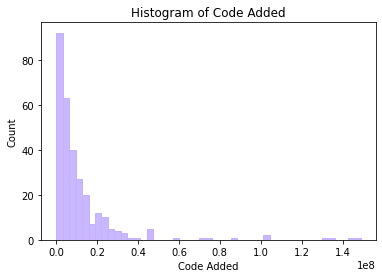

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 计算code_add列的最大值
max_value = df['code_add'].max()
print("最大值:", max_value)

# 计算code_add列的平均值
mean_value = df['code_add'].mean()
print("平均值:", mean_value)

# 计算code_add列的最小值
min_value = df['code_add'].min()
print("最小值:", min_value)
print("频数:", df['code_add'].value_counts())

# 绘制code_add列的密度图
sns.kdeplot(data=df['code_add'], color='blue', shade=True)
plt.xlabel('Code Added')  # 设置x轴标签
plt.ylabel('Density')  # 设置y轴标签
plt.title('Density Plot of Code Added')  # 设置图标题
plt.show()

# 绘制code_add列的直方图
# plt.figure(figsize=(6, 6))  # 调整图形尺寸
sns.histplot(data=df['code_add'], color='#C4B0FF', alpha=0.9, linewidth=1, edgecolor='#C4B0FF')
plt.xlabel('Code Added')  # 设置x轴标签
plt.ylabel('Count')  # 设置y轴标签
plt.title('Histogram of Code Added')  # 设置图标题
plt.show()

每个项目减少的总代码行数

最大值: 88013171
平均值: 6700876.57
最小值: 0
频数: 0          3
2415911    1
8645816    1
4130604    1
8670021    1
          ..
1113455    1
5956297    1
5128858    1
2424743    1
4684974    1
Name: code_remove, Length: 298, dtype: int64


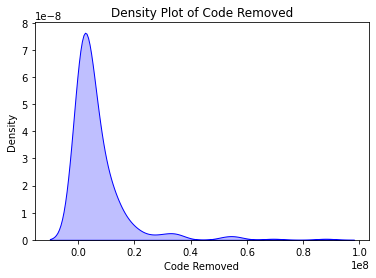

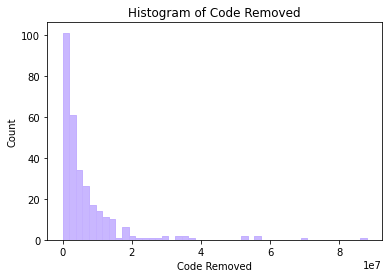

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 计算最大值
max_value = df['code_remove'].max()
print("最大值:", max_value)

# 计算平均值
mean_value = df['code_remove'].mean()
print("平均值:", mean_value)

# 计算最小值
min_value = df['code_remove'].min()
print("最小值:", min_value)
print("频数:", df['code_remove'].value_counts())

# 绘制密度图
sns.kdeplot(data=df['code_remove'], color='blue', shade=True)
plt.xlabel('Code Removed')  # 设置x轴标签
plt.ylabel('Density')  # 设置y轴标签
plt.title('Density Plot of Code Removed')  # 设置图标题
plt.show()

# 绘制直方图
# plt.figure(figsize=(6, 6))  # 调整图形尺寸
sns.histplot(data=df['code_remove'], color='#C4B0FF', alpha=0.9, linewidth=1, edgecolor='#C4B0FF')
plt.xlabel('Code Removed')  # 设置x轴标签
plt.ylabel('Count')  # 设置y轴标签
plt.title('Histogram of Code Removed')  # 设置图标题
plt.show()

每个项目变化的总代码行数，即该项目目前的总代码行数

最大值: 113257190
平均值: 5382790.91
最小值: -6131590
频数: 0           3
1560168     1
17882788    1
14474223    1
3143866     1
           ..
1184216     1
5144284     1
5226487     1
3932696     1
2468020     1
Name: code_change_sum, Length: 298, dtype: int64


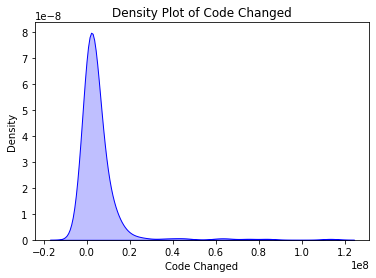

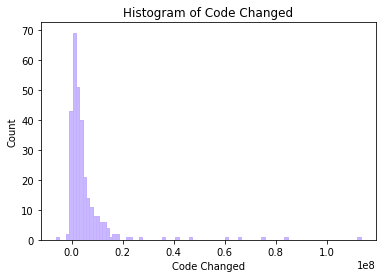

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 计算最大值
max_value = df['code_change_sum'].max()
print("最大值:", max_value)

# 计算平均值
mean_value = df['code_change_sum'].mean()
print("平均值:", mean_value)

# 计算最小值
min_value = df['code_change_sum'].min()
print("最小值:", min_value)
print("频数:", df['code_change_sum'].value_counts())

# 绘制密度图
sns.kdeplot(data=df['code_change_sum'], color='blue', shade=True)
plt.xlabel('Code Changed')  # 设置x轴标签
plt.ylabel('Density')  # 设置y轴标签
plt.title('Density Plot of Code Changed')  # 设置图标题
plt.show()

# 绘制直方图
# plt.figure(figsize=(6, 6))  # 调整图形尺寸
sns.histplot(data=df['code_change_sum'], color='#C4B0FF', alpha=0.9, linewidth=1, edgecolor='#C4B0FF')
plt.xlabel('Code Changed')  # 设置x轴标签
plt.ylabel('Count')  # 设置y轴标签
plt.title('Histogram of Code Changed')  # 设置图标题
plt.show()

根据上述图表的观察结果，可以看出大多数TOP300项目的代码量都集中在1亿行以下，而只有个别项目的代码行数接近1亿行。根据图表分析，绝大多数项目的代码量较小，可能在数百万到数千万行之间。这表明这些项目可能是相对较小规模的软件项目或者简单的应用程序。然而，也有一小部分项目的代码量相当庞大，接近1亿行。这些项目可能是复杂的软件系统、大型框架或者庞大的应用程序。这样的项目往往需要处理更多的功能需求、业务逻辑和复杂的技术细节，因此代码量相对较大。需要注意的是，代码行数并不一定是衡量项目质量或价值的唯一标准。项目的规模和复杂性可以受多种因素影响，包括功能需求、技术选型、开发团队规模等。
##### 3.3 项目贡献者数量分析

In [1]:
# 获得每个项目的贡献者总数
from pandas import DataFrame
import os, json

df2 = DataFrame(columns=['org_name', 'repo_name', 'num_contributors'])
i = 0
with open('./data/repo_name.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        line = line.strip()  # 去除换行符
        org_name, repo_name = line.split('/')

        file_contributors = f'./data/top_300_metrics/{org_name}/{repo_name}/new_contributors.json'

        num_contributors = 0
        #计算项目的贡献者总数
        if os.path.exists(file_contributors):
            with open(file_contributors, 'r', encoding='utf-8') as file:
                data = json.load(file) 
                num_contributors = sum(data.values())            

        df2.loc[i] = [org_name, repo_name, num_contributors]        
        # print(org_name, repo_name, code_add_sum, code_remove_sum, code_change_sum)
        i += 1

# pd.options.display.max_rows = None      
# print(df2)

最大值: 49810
平均值: 1263.3433333333332
最小值: 0
频数: 0        5
3        4
2        3
5        3
1        3
        ..
925      1
13905    1
2295     1
709      1
530      1
Name: num_contributors, Length: 263, dtype: int64


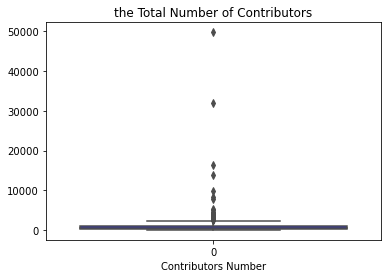

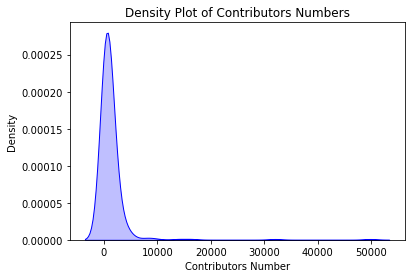

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 计算最大值
max_value = df2['num_contributors'].max()
print("最大值:", max_value)

# 计算平均值
mean_value = df2['num_contributors'].mean()
print("平均值:", mean_value)

# 计算的最小值
min_value = df2['num_contributors'].min()
print("最小值:", min_value)
print("频数:", df2['num_contributors'].value_counts())

# 绘制箱型图
sns.boxplot(data=df2['num_contributors'], color='blue')
plt.xlabel('Contributors Number')  # 设置x轴标签
# plt.ylabel('Count')  # 设置y轴标签
plt.title('the Total Number of Contributors')  # 设置图标题
plt.show()

# 绘制密度图
sns.kdeplot(data=df2['num_contributors'], color='blue', shade=True)
plt.xlabel('Contributors Number')  # 设置x轴标签
plt.ylabel('Density')  # 设置y轴标签
plt.title('Density Plot of Contributors Numbers')  # 设置图标题
plt.show()

通过对箱型图和密度图的观察，可以发现大多数TOP300项目的贡献者数量集中在三位数以内，而只有个别项目的贡献者数量达到了接近50000人的规模。此外，还有一些项目的贡献者数量只有个位数。根据箱型图的展示，大部分项目的贡献者数量分布较为集中，位于较小的值范围内。这表明这些项目可能是由较小规模的开发团队或个人开发者完成的。然而，也存在个别项目的贡献者数量较大，甚至接近50000人。这些项目可能是非常受欢迎或广泛采用的开源项目，吸引了大量的开发者参与其中。这些项目往往具有更高的知名度和社区支持，因此能够吸引更多的贡献者。
需要注意的是，贡献者数量并不是衡量项目质量或影响力的唯一标准。虽然一些项目拥有大量的贡献者，但并不一定意味着项目质量更高或更成功。项目的质量和影响力还受其他因素的影响，如代码质量、用户反馈、市场需求等。因此，在评估项目时，还需要综合考虑其他指标和因素。

2.4 代码规模

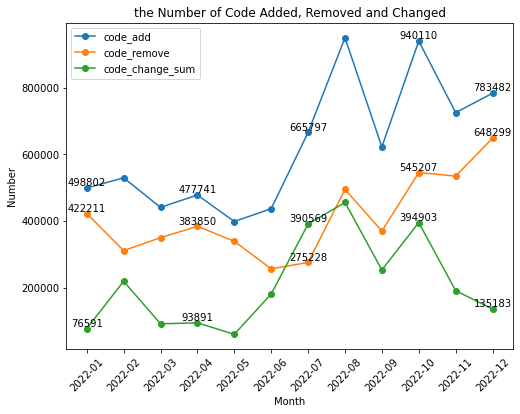

In [6]:
import json
import matplotlib.pyplot as plt
most_active_proj = './data/top_300_metrics/NixOS/nixpkgs'

plt.figure(figsize=(8, 6))
path_list = {"code_add": f'{most_active_proj}/code_change_lines_add.json', 
             "code_remove": f'{most_active_proj}/code_change_lines_remove.json',
             "code_change_sum": f'{most_active_proj}/code_change_lines_sum.json'}
for type, path in path_list.items():
    with open(path, 'r') as source:
        data = json.load(source)
        data_2022 = {k:v for k,v in data.items() if k.startswith('2022')}
        months = list(data_2022.keys())
        values = list(data_2022.values())
        plt.plot(months, values, 'o-', label=type)
        for i in range(len(months)):
            if i % 3 == 0 or i ==11: # 隔三个点标注数据
                plt.text(months[i], values[i], values[i], ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number')
plt.title('the Number of Code Added, Removed and Changed')
plt.legend()
# plt.savefig('./image/code_add.png')
plt.show()

根据上图可以观察到，NixOS/nixpkgs在2022年的上半年更改的代码行数明显低于下半年。具体来说，上半年的代码更改量相对较少，而下半年的代码更改量明显增加。这可能意味着在2022年的后半年，该项目经历了较大规模的代码更改和开发活动。此外，从图中可以观察到增加代码和删除代码的趋势大致相同。这意味着在每个月份中，该项目的代码行数增加和删除的量相对平衡，可能是由于修复错误、添加新功能或进行重构等因素。根据图表中的数据，2022年12月的代码总行数为135183行。这个数字表示在该项目中，截至2022年底，代码总行数为135,183行。需要注意的是，仅凭代码行数无法全面评估项目的复杂性或质量。代码行数只是项目的一个度量指标，实际的项目价值和质量还需要考虑其他因素，如代码质量、功能完整性、性能等。因此，在评估项目时，需要综合考虑多个因素。